# 데이터 확인

In [125]:
import pandas as pd
import numpy as np

import warnings
warnings.filterwarnings("ignore")

In [95]:
# 기본 정보: 성별(gender), 국적(NationalITy), 출생지(PlaceofBirth), 학년(StageID, GradeID), 학급(SectionID).
# 학업 관련 정보: 토론 참여 횟수(Discussion), 학습 자료 방문 횟수(VisITedResources), 손들기 횟수(raisedhands), 공지 열람 횟수(AnnouncementsView).
# 부모 관련 정보: 부모 설문 참여 여부(ParentAnsweringSurvey), 부모 학교 만족도(ParentschoolSatisfaction).
# 출석 정보: 결석 일수(StudentAbsenceDays).
# 학업 성과: 학생의 학업 성과(Class)로, Low(L), Medium(M), High(H)로 분류.

In [126]:
train_df = pd.read_csv('./data/student_marks_train.csv')
print(train_df.shape)
train_df.head()

(380, 17)


,gender,NationalITy,PlaceofBirth,StageID,GradeID,SectionID,Topic,Semester,Relation,raisedhands,VisITedResources,AnnouncementsView,Discussion,ParentAnsweringSurvey,ParentschoolSatisfaction,StudentAbsenceDays,Class
0,M,KW,KuwaIT,lowerlevel,G-04,A,IT,F,Father,15,16,2,20,Yes,Good,Under-7,M
1,M,KW,KuwaIT,lowerlevel,G-04,A,IT,F,Father,20,20,3,25,Yes,Good,Under-7,M
2,M,KW,KuwaIT,lowerlevel,G-04,A,IT,F,Father,10,7,0,30,No,Bad,Above-7,L
3,M,KW,KuwaIT,lowerlevel,G-04,A,IT,F,Father,40,50,12,50,No,Bad,Above-7,M
4,M,KW,KuwaIT,MiddleSchool,G-07,A,Math,F,Father,35,12,0,17,No,Bad,Above-7,L


In [97]:
train_df.isnull().sum()

gender                      0
NationalITy                 0
PlaceofBirth                0
StageID                     0
GradeID                     0
SectionID                   0
Topic                       0
Semester                    0
Relation                    0
raisedhands                 0
VisITedResources            0
AnnouncementsView           0
Discussion                  0
ParentAnsweringSurvey       0
ParentschoolSatisfaction    0
StudentAbsenceDays          0
Class                       0
dtype: int64

In [98]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 380 entries, 0 to 379
Data columns (total 17 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   gender                    380 non-null    object
 1   NationalITy               380 non-null    object
 2   PlaceofBirth              380 non-null    object
 3   StageID                   380 non-null    object
 4   GradeID                   380 non-null    object
 5   SectionID                 380 non-null    object
 6   Topic                     380 non-null    object
 7   Semester                  380 non-null    object
 8   Relation                  380 non-null    object
 9   raisedhands               380 non-null    int64 
 10  VisITedResources          380 non-null    int64 
 11  AnnouncementsView         380 non-null    int64 
 12  Discussion                380 non-null    int64 
 13  ParentAnsweringSurvey     380 non-null    object
 14  ParentschoolSatisfaction  

# EDA

In [99]:
import seaborn as sns
import matplotlib.pyplot as plt

## Class 분포 확인

Class
M    0.43
H    0.31
L    0.26
Name: proportion, dtype: float64

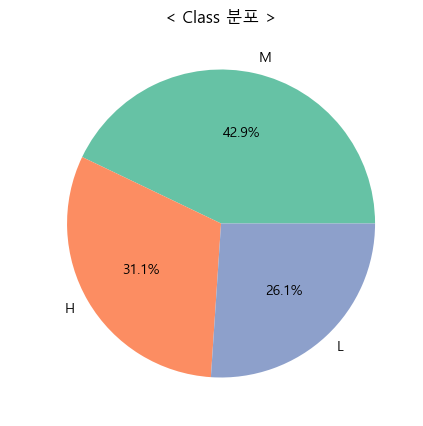

In [100]:
sr = train_df['Class'].value_counts(normalize=True)
colors = sns.color_palette("Set2")

fig, ax = plt.subplots(figsize=(10,5))
_=sr.plot.pie(ax=ax, autopct=lambda p: f'{p:.1f}%', labels=sr.index, colors = colors)
_=plt.title("< Class 분포 >")
_=plt.ylabel(" ")

round(sr, 2)

## 상관계수

In [101]:
corr_matrix = train_df[['raisedhands', 'VisITedResources', 'AnnouncementsView', 'Discussion']].corr()
# _ = sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
round(corr_matrix, 2)

,raisedhands,VisITedResources,AnnouncementsView,Discussion
raisedhands,1.00,0.69,0.66,0.35
VisITedResources,0.69,1.00,0.60,0.24
AnnouncementsView,0.66,0.60,1.00,0.42
Discussion,0.35,0.24,0.42,1.00


## 기본 정보 관련

### Class별 성비

In [128]:
df1 = train_df.groupby('Class')['gender'].value_counts(normalize=True).to_frame()
df1

proportion
Class gender            
H     F         0.542373
      M         0.457627
L     M         0.818182
      F         0.181818
M     M         0.631902
      F         0.368098

### 성별 Class 비율

,gender,Class,%
0,F,H,45.07
2,F,L,12.68
1,F,M,42.25
5,M,H,22.69
4,M,L,34.03
3,M,M,43.28


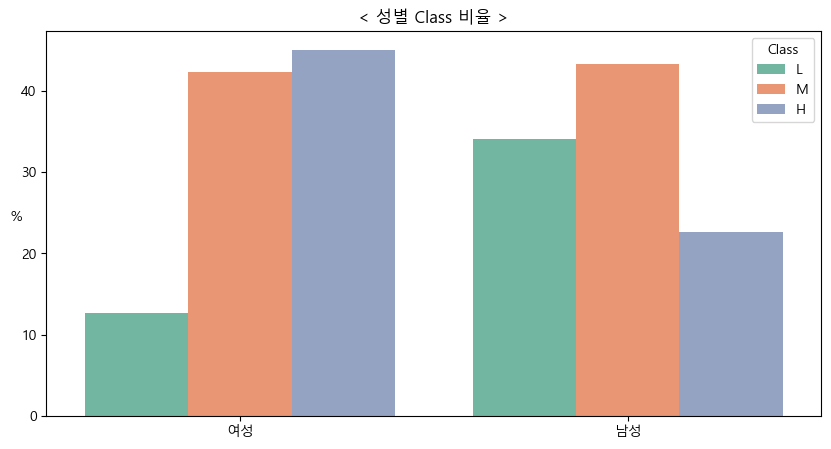

In [118]:
df1 = train_df.groupby('gender')['Class'].value_counts(normalize=True).to_frame()
df1.reset_index(inplace=True)
df1.sort_values(by=['gender','Class'], inplace=True)
df1.rename(columns={'proportion':'%'}, inplace=True)
df1['%'] = round(df1["%"]*100,2)

colors =  sns.color_palette("Set2")
fig, ax = plt.subplots(figsize=(10,5))
_= sns.barplot(data = df1, x = 'gender', y = '%',
               hue = 'Class', hue_order=['L','M','H'], palette=colors)

_=plt.title("< 성별 Class 비율 >")
_=plt.xlabel('')
_=plt.xticks(ticks = [0,1], labels = ['여성','남성'])
_=plt.ylabel('%', rotation=0)
df1

## 학부모 관련

### 학부모 응답 여부별 Class 비율

,ParentAnsweringSurvey,Class,%
2,No,H,15.76
0,No,L,47.88
1,No,M,36.36
4,Yes,H,42.79
5,Yes,L,9.30
3,Yes,M,47.91


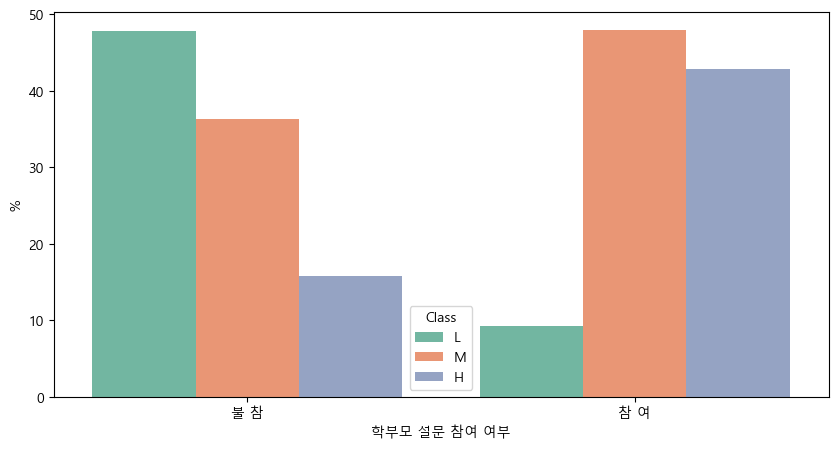

In [123]:
df1 = train_df.groupby('ParentAnsweringSurvey')['Class'].value_counts(normalize=True).to_frame()
df1.reset_index(inplace=True)
df1.sort_values(by=['ParentAnsweringSurvey','Class'], inplace=True)
df1.rename(columns={'proportion':'%'}, inplace=True)
df1['%'] = round(df1["%"]*100,2)

fig, ax = plt.subplots(figsize=(10,5))
_= sns.barplot(data = df1, x = 'ParentAnsweringSurvey', y = '%',
               hue = 'Class', hue_order=['L','M','H'], palette=colors)
_= plt.xlabel("학부모 설문 참여 여부")
_= plt.xticks([0,1], ['불 참','참 여'])
df1

## 수업 참여도 관련

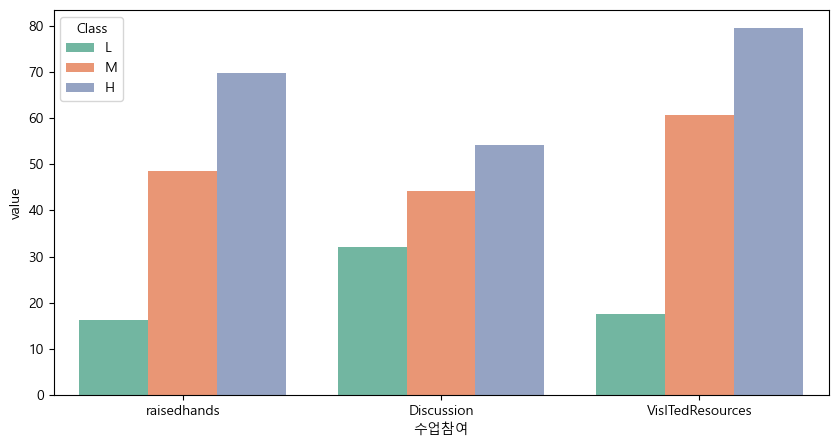

In [93]:
melted_data = train_df.melt(id_vars='Class', 
                            value_vars=['raisedhands', 'Discussion', 'VisITedResources'], 
                            var_name='수업참여', 
                            value_name='value')

fig, ax = plt.subplots(figsize=(10,5))
_=sns.barplot(data=melted_data, x='수업참여', y='value', 
              hue='Class', hue_order=['L','M','H'],
              estimator='mean', ci=None, palette=colors)

# melted_data.head()

# 전처리

In [12]:
X = train_df.drop(columns='Class')
y = train_df[['Class']]

In [13]:
from sklearn.preprocessing import MinMaxScaler
cols = ['raisedhands', 'VisITedResources', 'AnnouncementsView', 'Discussion']

for col in cols:
    X[col] = MinMaxScaler().fit_transform(X[[col]])
    
X.head()

,gender,NationalITy,PlaceofBirth,StageID,GradeID,SectionID,Topic,Semester,Relation,raisedhands,VisITedResources,AnnouncementsView,Discussion,ParentAnsweringSurvey,ParentschoolSatisfaction,StudentAbsenceDays
0,M,KW,KuwaIT,lowerlevel,G-04,A,IT,F,Father,0.15,0.161616,0.020408,0.193878,Yes,Good,Under-7
1,M,KW,KuwaIT,lowerlevel,G-04,A,IT,F,Father,0.20,0.202020,0.030612,0.244898,Yes,Good,Under-7
2,M,KW,KuwaIT,lowerlevel,G-04,A,IT,F,Father,0.10,0.070707,0.000000,0.295918,No,Bad,Above-7
3,M,KW,KuwaIT,lowerlevel,G-04,A,IT,F,Father,0.40,0.505051,0.122449,0.500000,No,Bad,Above-7
4,M,KW,KuwaIT,MiddleSchool,G-07,A,Math,F,Father,0.35,0.121212,0.000000,0.163265,No,Bad,Above-7


In [14]:
X = pd.get_dummies(X)
print(X.shape)
X.head()

(380, 70)


,raisedhands,VisITedResources,AnnouncementsView,Discussion,gender_F,gender_M,NationalITy_Egypt,NationalITy_Iran,NationalITy_Iraq,NationalITy_Jordan,...,Semester_F,Semester_S,Relation_Father,Relation_Mum,ParentAnsweringSurvey_No,ParentAnsweringSurvey_Yes,ParentschoolSatisfaction_Bad,ParentschoolSatisfaction_Good,StudentAbsenceDays_Above-7,StudentAbsenceDays_Under-7
0,0.15,0.161616,0.020408,0.193878,False,True,False,False,False,False,...,True,False,True,False,False,True,False,True,False,True
1,0.20,0.202020,0.030612,0.244898,False,True,False,False,False,False,...,True,False,True,False,False,True,False,True,False,True
2,0.10,0.070707,0.000000,0.295918,False,True,False,False,False,False,...,True,False,True,False,True,False,True,False,True,False
3,0.40,0.505051,0.122449,0.500000,False,True,False,False,False,False,...,True,False,True,False,True,False,True,False,True,False
4,0.35,0.121212,0.000000,0.163265,False,True,False,False,False,False,...,True,False,True,False,True,False,True,False,True,False


In [15]:
# from sklearn.preprocessing import LabelEncoder

# y = LabelEncoder().fit_transform(y)

y['Class'] = y['Class'].map({'L': 0, 'M': 1, 'H': 2})
y.head()

,Class
0,1
1,1
2,0
3,1
4,0


In [16]:
from sklearn.model_selection import train_test_split

X_train, X_val, y_train, y_val = train_test_split(X, y,
                                                  test_size=0.2,
                                                  random_state=11)

# 모델링

## RandomForestClassifier

In [17]:
from sklearn.ensemble import RandomForestClassifier

model = RandomForestClassifier(n_estimators = 150,
                               max_depth=10,
                               random_state=12)
_ = model.fit(X_train, y_train)
pred = model.predict(X_val)

from sklearn.metrics import accuracy_score, f1_score, classification_report
print(accuracy_score(y_val, pred))
print(f1_score(y_val, pred, average='macro'))
print(classification_report(y_val, pred))

0.7894736842105263
0.8125
              precision    recall  f1-score   support

           0       1.00      0.88      0.94        17
           1       0.80      0.71      0.75        34
           2       0.68      0.84      0.75        25

    accuracy                           0.79        76
   macro avg       0.83      0.81      0.81        76
weighted avg       0.80      0.79      0.79        76



## svm

In [18]:
from sklearn import svm

model2 = svm.SVC(kernel='rbf', random_state=13)
_ = model2.fit(X_train, y_train)
pred = model2.predict(X_val)

from sklearn.metrics import accuracy_score, f1_score, classification_report
print(accuracy_score(y_val, pred))
print(f1_score(y_val, pred, average='macro'))
print(classification_report(y_val, pred))

0.7236842105263158
0.7508935508935508
              precision    recall  f1-score   support

           0       0.94      0.88      0.91        17
           1       0.71      0.65      0.68        34
           2       0.62      0.72      0.67        25

    accuracy                           0.72        76
   macro avg       0.76      0.75      0.75        76
weighted avg       0.73      0.72      0.73        76



## XGBClassifier

In [19]:
from xgboost import XGBClassifier

model3 = XGBClassifier()
_ = model3.fit(X_train, y_train)
pred = model3.predict(X_val)

from sklearn.metrics import accuracy_score, f1_score, classification_report
print(accuracy_score(y_val, pred))
print(f1_score(y_val, pred, average='macro'))
print(classification_report(y_val, pred))

0.8026315789473685
0.8207123269567517
              precision    recall  f1-score   support

           0       0.89      1.00      0.94        17
           1       0.88      0.65      0.75        34
           2       0.69      0.88      0.77        25

    accuracy                           0.80        76
   macro avg       0.82      0.84      0.82        76
weighted avg       0.82      0.80      0.80        76



# test data 전처리

In [20]:
test_df = pd.read_csv('./data/student_marks_test.csv')
print(test_df.shape)
test_df.head()

(100, 17)


,ID,gender,NationalITy,PlaceofBirth,StageID,GradeID,SectionID,Topic,Semester,Relation,raisedhands,VisITedResources,AnnouncementsView,Discussion,ParentAnsweringSurvey,ParentschoolSatisfaction,StudentAbsenceDays
0,0,M,KW,KuwaIT,lowerlevel,G-04,A,IT,F,Father,30,25,5,35,No,Bad,Above-7
1,1,F,KW,KuwaIT,lowerlevel,G-04,A,IT,F,Father,42,30,13,70,Yes,Bad,Above-7
2,2,M,lebanon,lebanon,MiddleSchool,G-08,A,Math,F,Father,20,14,12,19,No,Bad,Above-7
3,3,M,KW,KuwaIT,MiddleSchool,G-07,B,IT,F,Father,36,30,20,80,No,Bad,Above-7
4,4,M,KW,KuwaIT,MiddleSchool,G-07,A,IT,F,Father,15,21,2,90,No,Bad,Under-7


In [21]:
X_test = test_df.drop(columns='ID')

cols = ['raisedhands', 'VisITedResources', 'AnnouncementsView', 'Discussion']
from sklearn.preprocessing import MinMaxScaler
for col in cols:
    X_test[col] = MinMaxScaler().fit_transform(X_test[[col]])
 
X_test = pd.get_dummies(X_test)

print(X_test.shape)
X_test.head()

(100, 70)


,raisedhands,VisITedResources,AnnouncementsView,Discussion,gender_F,gender_M,NationalITy_Egypt,NationalITy_Iran,NationalITy_Iraq,NationalITy_Jordan,...,Semester_F,Semester_S,Relation_Father,Relation_Mum,ParentAnsweringSurvey_No,ParentAnsweringSurvey_Yes,ParentschoolSatisfaction_Bad,ParentschoolSatisfaction_Good,StudentAbsenceDays_Above-7,StudentAbsenceDays_Under-7
0,0.30,0.239583,0.052632,0.350515,False,True,False,False,False,False,...,True,False,True,False,True,False,True,False,True,False
1,0.42,0.291667,0.136842,0.711340,True,False,False,False,False,False,...,True,False,True,False,False,True,True,False,True,False
2,0.20,0.125000,0.126316,0.185567,False,True,False,False,False,False,...,True,False,True,False,True,False,True,False,True,False
3,0.36,0.291667,0.210526,0.814433,False,True,False,False,False,False,...,True,False,True,False,True,False,True,False,True,False
4,0.15,0.197917,0.021053,0.917526,False,True,False,False,False,False,...,True,False,True,False,True,False,True,False,False,True


In [22]:
cols = list(set(X.columns) - set(X_test.columns))
print(cols)

['NationalITy_USA', 'GradeID_G-05']


In [23]:
X_test[cols] = False
X_test = X_test[X.columns]
X_test.head()

,raisedhands,VisITedResources,AnnouncementsView,Discussion,gender_F,gender_M,NationalITy_Egypt,NationalITy_Iran,NationalITy_Iraq,NationalITy_Jordan,...,Semester_F,Semester_S,Relation_Father,Relation_Mum,ParentAnsweringSurvey_No,ParentAnsweringSurvey_Yes,ParentschoolSatisfaction_Bad,ParentschoolSatisfaction_Good,StudentAbsenceDays_Above-7,StudentAbsenceDays_Under-7
0,0.30,0.239583,0.052632,0.350515,False,True,False,False,False,False,...,True,False,True,False,True,False,True,False,True,False
1,0.42,0.291667,0.136842,0.711340,True,False,False,False,False,False,...,True,False,True,False,False,True,True,False,True,False
2,0.20,0.125000,0.126316,0.185567,False,True,False,False,False,False,...,True,False,True,False,True,False,True,False,True,False
3,0.36,0.291667,0.210526,0.814433,False,True,False,False,False,False,...,True,False,True,False,True,False,True,False,True,False
4,0.15,0.197917,0.021053,0.917526,False,True,False,False,False,False,...,True,False,True,False,True,False,True,False,False,True


# 예측

In [24]:
values = model3.predict(X_test)
print(values)

[1 1 0 1 0 0 1 1 0 0 0 2 0 0 2 0 2 2 0 0 1 0 0 0 0 2 1 1 0 1 2 2 2 1 0 2 2
 1 0 2 0 1 1 1 2 1 0 0 0 1 1 1 1 2 1 2 2 2 2 0 1 2 1 1 2 1 2 1 0 1 1 1 0 1
 0 1 0 0 2 2 2 2 0 1 0 2 2 1 1 1 1 1 1 1 1 2 1 1 1 0]


In [25]:
result_df = pd.read_csv('./data/sample_submission.csv')
result_df.head()

,ID,Class
0,0,NaN
1,1,NaN
2,2,NaN
3,3,NaN
4,4,NaN


In [26]:
result_df['Class'] = values
result_df['Class'] = result_df['Class'].map({0:'L',
                                             1:'M',
                                             2:'H'})
result_df.head()

,ID,Class
0,0,M
1,1,M
2,2,L
3,3,M
4,4,L
